In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [35]:
msft = yf.Ticker("MSFT")
data = msft.history(period="2mo")


In [36]:
print(len(data))
data.head()

42


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-18 00:00:00-05:00,368.768053,372.311488,367.999455,371.962128,21802900,0.0,0.0
2023-12-19 00:00:00-05:00,370.804292,372.571045,369.157344,372.571045,20603700,0.0,0.0
2023-12-20 00:00:00-05:00,374.307803,375.335900,369.846052,369.935883,26316700,0.0,0.0
2023-12-21 00:00:00-05:00,371.872323,373.718914,369.356985,372.850525,17708000,0.0,0.0
2023-12-22 00:00:00-05:00,372.990248,374.487479,372.022037,373.888580,17091100,0.0,0.0


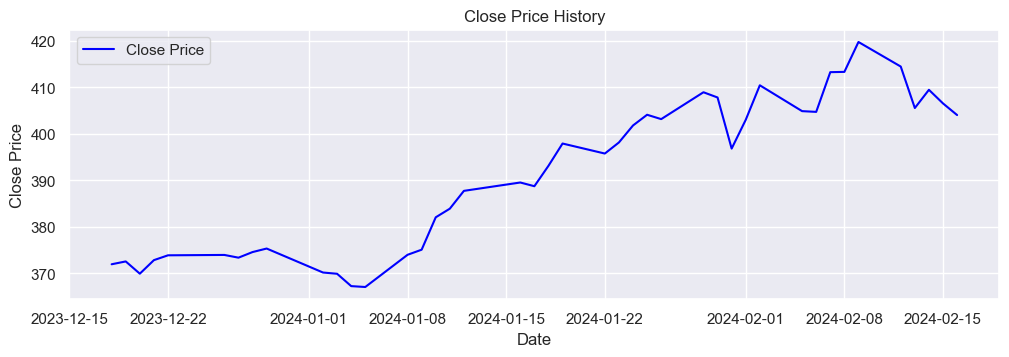

In [37]:

 
df = data
 
plt.figure(figsize=(12,3.5))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [38]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
Date,,,,
2023-12-18 00:00:00-05:00,0.0,371.962128,NaN,NaN
2023-12-19 00:00:00-05:00,0.0,372.571045,NaN,NaN
2023-12-20 00:00:00-05:00,0.0,369.935883,NaN,NaN
2023-12-21 00:00:00-05:00,0.0,372.850525,NaN,NaN
2023-12-22 00:00:00-05:00,0.0,373.888580,NaN,NaN
2023-12-26 00:00:00-05:00,-1.0,373.968445,373.888580,369.935883
2023-12-27 00:00:00-05:00,0.0,373.379547,373.968445,369.935883
2023-12-28 00:00:00-05:00,-1.0,374.587280,373.968445,369.935883
2023-12-29 00:00:00-05:00,-1.0,375.345886,374.587280,372.850525


In [39]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [48]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'],initial_money=1000,max_buy=100,max_sell=3)


day 5: cannot sell anything, inventory 0
day 7: cannot sell anything, inventory 0
day 8: cannot sell anything, inventory 0
day 9: buy 2 units at price 740.370850, total balance 259.629150
day 10: total balances 259.629150, not enough money to buy a unit price 369.915924
day 11: total balances 259.629150, not enough money to buy a unit price 367.260834
day 12: total balances 259.629150, not enough money to buy a unit price 367.071198
day 14, sell 2 units at price 750.192749, investment 2.186273 %, total balance 1009.821899,
day 15: cannot sell anything, inventory 0
day 16: cannot sell anything, inventory 0
day 17: cannot sell anything, inventory 0
day 18: cannot sell anything, inventory 0
day 20: cannot sell anything, inventory 0
day 21: cannot sell anything, inventory 0
day 23: cannot sell anything, inventory 0
day 24: cannot sell anything, inventory 0
day 25: cannot sell anything, inventory 0
day 27: cannot sell anything, inventory 0
day 29: buy 2 units at price 793.692261, total bala

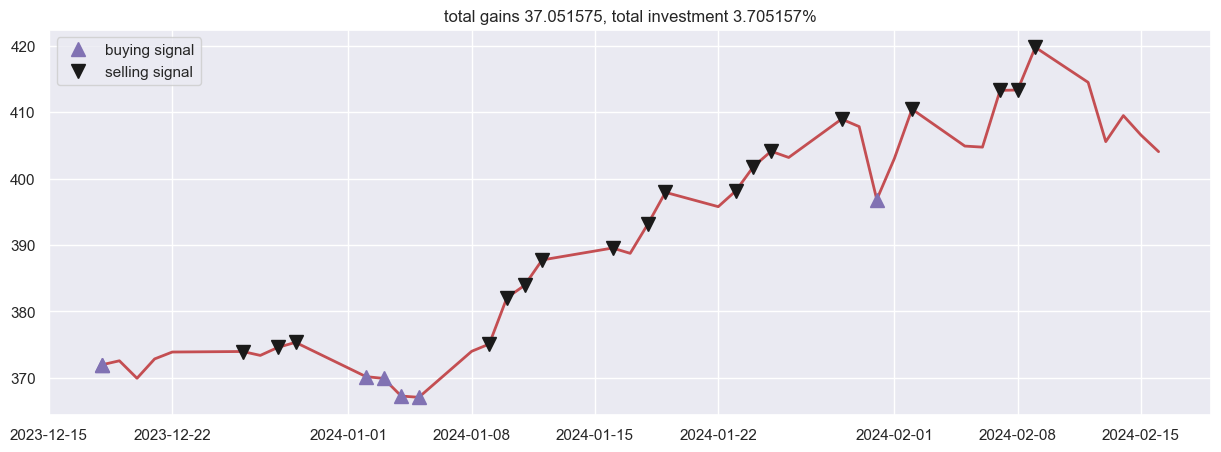

In [49]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [53]:
from agent import *

ValueError: Length of values (30) does not match length of index (1)